In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [45]:
df_poscon_raw = pd.read_csv('/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_jcp2022.csv')
df_plates_raw = pd.read_csv('/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_plate.csv')


In [90]:
path_poscon_openphenom = "/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_openphenom = "/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_plate.csv"
path_poscon_dinov2_g = "/home/maxime/synrepos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_dinov2_g = "/home/maxime/synrepos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_plate.csv"

In [28]:
#df_poscon = pd.read_csv('/projects/synsight/repos/phenospace/normalisation/experiments/dinov2/test_all_transform_9_plates/results/maps_df_poscon.csv')
#df_plates = pd.read_csv('/projects/synsight/repos/phenospace/normalisation/experiments/dinov2/test_all_transform_9_plates/results/maps_df_controls_Plate.csv')


# Poscon mAP

In [96]:
def preprocess(path):
    df_raw = pd.read_csv(path)
    df_raw.columns = [col.replace('mAP', '').replace('raw_', '').replace('(', '').replace(')', '').replace('raw', 'Raw').strip() for col in df_raw.columns]
    df = df_raw.drop(columns=['Number of Queries'])
    df = df.set_index('Label').drop(index='Mean mAP').astype(float)
    return df.mean()


In [52]:
def plot_curve_comparison(mean_values_1, mean_values_2, best_normalisation_index):
    """
    Plot one curve against the other for comparison with custom styling.
    Highlights the first point (No Normalisation), a random metric, 
    and a dynamically selected "Best Normalisation" point for publication-ready output.
    
    Args:
        mean_values_1: First set of mean values.
        mean_values_2: Second set of mean values.
        best_normalisation_index: Index of the point considered "Best Normalisation".
    """
    plt.figure(figsize=(12, 6))  # Increased figure width for better x-axis spacing
    
    # General scatter plot with lighter points
    plt.scatter(mean_values_1, mean_values_2, 
                color='grey', alpha=0.4, s=30, marker='x', label='Curve Comparison')

    # Highlight the first point (No Normalisation)
    plt.scatter(mean_values_1['Embeddings_Raw'], mean_values_2['Embeddings_Raw'], 
                color='#D55E00', alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                marker='o', label='No Normalisation')
    
    ## Highlight the random value point
    #plt.scatter(mean_values_1['Random  Raw'], mean_values_2['Random  Raw'], 
    #            color='#0072B2', alpha=1.0, s=100, edgecolor='black', linewidth=1, 
    #            marker='o', label='Random Value of Metrics')

    # Highlight the best normalisation point
    plt.scatter(mean_values_1[best_normalisation_index], mean_values_2[best_normalisation_index], 
                color='#009E73', alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                marker='o', label='Best Normalisation')
    
    # Add labels with enhanced font size
    plt.xlabel('mAP - Batch Effect Estimation', fontsize=14, labelpad=10)
    plt.ylabel('mAP - Biological Signal Preservation', fontsize=14, labelpad=10)
    
    # Refine grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
    
    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Move legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, frameon=False)
    
    # Tight layout for better use of space and high resolution
    plt.tight_layout()
    plt.savefig("curve_comparison_plot_wide.png", dpi=300, bbox_inches='tight')  # Save high-res figure
    plt.show()


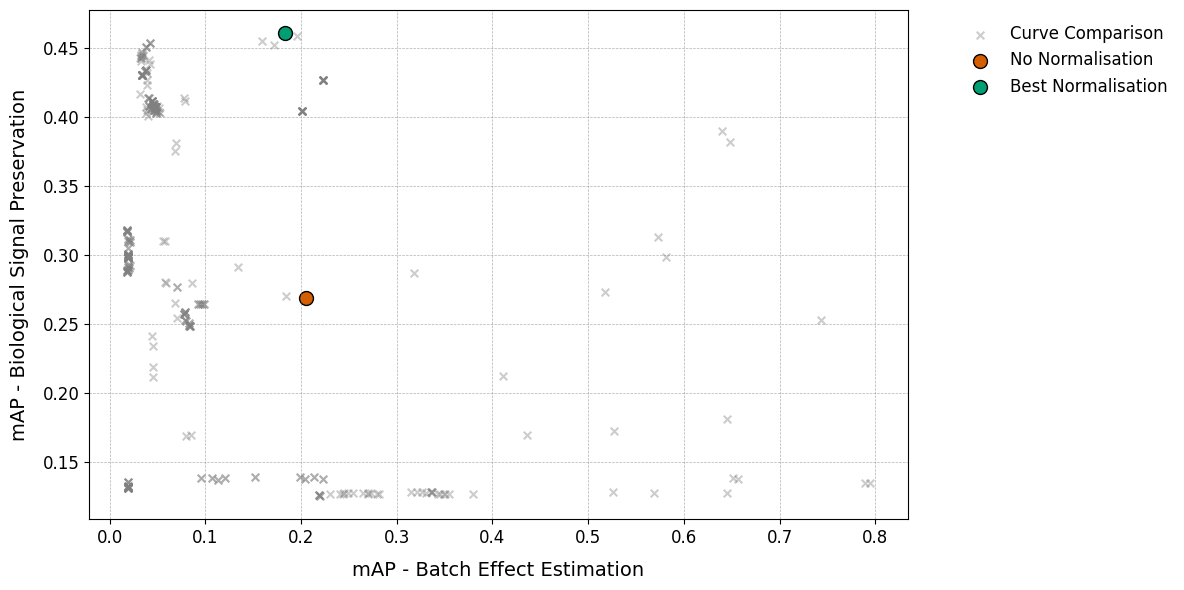

In [53]:
plot_curve_comparison(plates_values, poscon_values, "Embeddings_Raw__ZCA-cor_C__rZMi")


In [88]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def plot_curve_comparison(encoders_dict):
    """
    Plot mAP values for multiple encoders with custom styling.
    Highlights specific points for each encoder (No Normalisation, Random Metric, Best Normalisation).

    Args:
        encoders_dict: Dictionary where keys are encoder names and values are lists containing:
                       [mean_values_1, mean_values_2, best_normalisation_index].
    """
    plt.figure(figsize=(14, 8))

    # Define marker styles for each encoder
    marker_styles = ['o', 's', 'D', '^', 'v', 'P', 'X']  # Extend as needed
    colors = ['#D55E00', '#0072B2', '#009E73', '#CC79A7', '#F0E442']  # Extend as needed

    color_patches = []  # For color legend
    shape_patches = []  # For shape legend

    for i, (encoder, values) in enumerate(encoders_dict.items()):
        mean_values_1, mean_values_2, best_normalisation_index = values

        # Assign unique marker and color
        marker = marker_styles[i % len(marker_styles)]
        color = colors[i % len(colors)]

        # General scatter plot with lighter points
        plt.scatter(mean_values_1, mean_values_2, 
                    color=color, alpha=0.2, s=30, marker=marker, label=f'{encoder} (all points)')

        # Highlight the first point (No Normalisation)
        plt.scatter(mean_values_1['Embeddings_Raw'], mean_values_2['Embeddings_Raw'], 
                    color=color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker, label=f'{encoder} - No Normalisation')

        # Highlight the best normalisation point
        plt.scatter(mean_values_1[best_normalisation_index], mean_values_2[best_normalisation_index], 
                    color=color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker, label=f'{encoder} - Best Normalisation')

        # Add to shape and color legend if not already added
        if color not in [patch.get_facecolor() for patch in color_patches]:
            color_patches.append(mpatches.Patch(color=color, label=f'{encoder} color'))
        if marker not in [line.get_marker() for line in shape_patches]:
            shape_patches.append(mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=10, label=f'{encoder} shape'))

    # Add labels
    plt.xlabel('mAP - Batch Effect Estimation', fontsize=14, labelpad=10)
    plt.ylabel('mAP - Biological Signal Preservation', fontsize=14, labelpad=10)

    # Refine grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add legends
    plt.legend(handles=color_patches, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title='Color Legend')
    plt.legend(handles=shape_patches, loc='upper left', bbox_to_anchor=(1.05, 0.5), fontsize=12, title='Shape Legend')

    # Tight layout for better use of space and high resolution
    plt.tight_layout()
 #   plt.savefig("curve_comparison_plot_encoders.png", dpi=300, bbox_inches='tight')  # Save high-res figure
    plt.show()


In [98]:
preprocess(path_poscon_openphenom).sort_values()

Embeddings_Raw__PCA_N__MedPol      0.125141
Embeddings_Raw__PCA__MedPol        0.125151
Embeddings_Raw__ZCA__MedPol        0.125729
Embeddings_Raw__ZCA_N__MedPol      0.125748
Embeddings_Raw__ZCA-cor__MedPol    0.125761
                                     ...   
Embeddings_Raw__rZMi               0.453244
Embeddings_Raw__Res11__rZMi        0.453244
Embeddings_Raw__ZCA-cor_C__rZMs    0.454577
Embeddings_Raw__ZCA_C__rZMi        0.458394
Embeddings_Raw__ZCA-cor_C__rZMi    0.460475
Length: 375, dtype: float64

In [104]:
all_encoder = {'Dinov2_g': [preprocess(path_plates_dinov2_g), preprocess(path_poscon_dinov2_g),  'Embeddings_Raw__ZCA-cor_C__rZMi'], 
               'open-phenom': [preprocess(path_plates_openphenom), preprocess(path_poscon_openphenom),  'Embeddings_Raw__ZCA-cor_C__rZMi']}

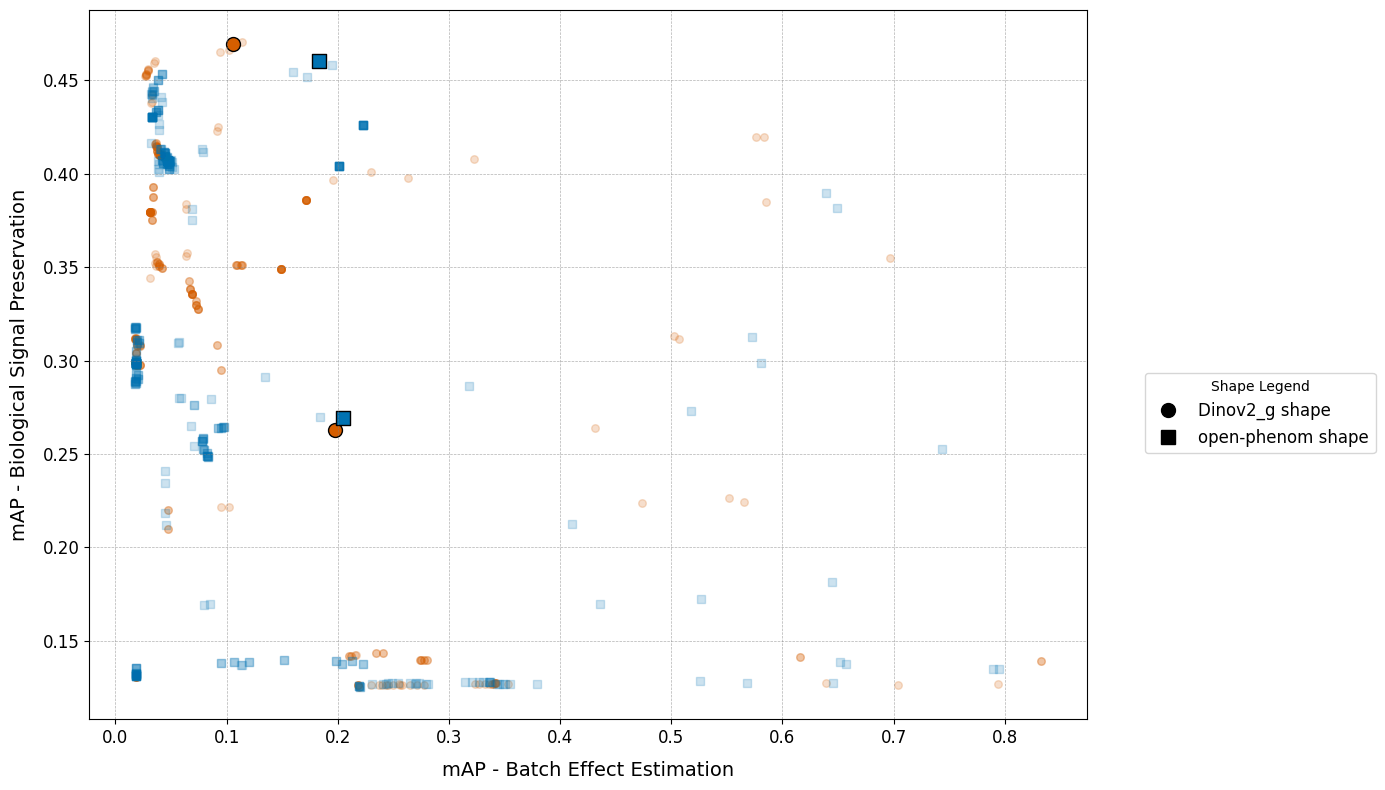

In [105]:
plot_curve_comparison(all_encoder)